<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/RandomForestAssgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("Fraud_check.csv")

In [ ]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


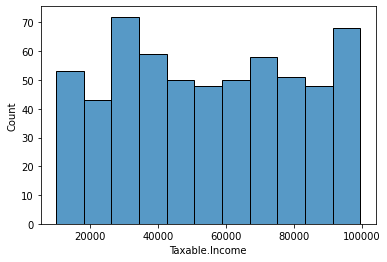

In [ ]:
sns.histplot(df['Taxable.Income'])
plt.show()

###Renaming the Columns

In [ ]:
df = df.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_exp',})
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


###Creating a New Column is_Check(Risky:if taxable_income<=30000,Good:if taxable_income>30000) to create Decision Tree Based on given Condition

In [ ]:
df['Check_is'] = ['Risky' if x <=30000 else 'Good' for x in df['taxable_income'] ]

In [ ]:
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,Check_is
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


##Lable Encoding the Categorical Variables

In [ ]:
df['Undergrad'] = label_encoder.fit_transform(df.Undergrad)
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,Check_is
0,0,Single,68833,50047,10,YES,Good
1,1,Divorced,33700,134075,18,YES,Good
2,0,Married,36925,160205,30,YES,Good
3,1,Single,50190,193264,15,YES,Good
4,0,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES,Good
596,1,Divorced,69967,55369,2,YES,Good
597,0,Divorced,47334,154058,0,YES,Good
598,1,Married,98592,180083,17,NO,Good


In [ ]:
df['marital_status'] = label_encoder.fit_transform(df.marital_status)

In [ ]:
df['Urban'] = label_encoder.fit_transform(df.Urban)

In [ ]:
df['Check_is'] = label_encoder.fit_transform(df.Check_is)

In [ ]:
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,Check_is
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [ ]:
df = df.drop(['taxable_income'],axis=1)

In [ ]:
df

,Undergrad,marital_status,city_population,work_exp,Urban,Check_is
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


###Assigning X and Y Variables

In [ ]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [ ]:
X

,Undergrad,marital_status,city_population,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Check_is, Length: 600, dtype: int64

In [ ]:
df['Check_is'].unique()

array([0, 1])

In [ ]:
df.Check_is.value_counts()

0    476
1    124
Name: Check_is, dtype: int64

# **Building a Random Forest algorithm**

In [ ]:
model = RandomForestClassifier(n_estimators=100,max_features=4)

In [ ]:
result = cross_val_score(model,X,Y,cv=10)

In [ ]:
print(result.mean()*100)

73.33333333333334


##Finding Best Parameters Using Grid Search CV

In [ ]:
model1 = RandomForestClassifier()
n_estimators = [50,100,200,300]
max_features = [3,4,5]

param_grid = dict(n_estimators=n_estimators,max_features=max_features)

grid = GridSearchCV(model1,param_grid=param_grid,cv=10)
grid.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print(grid.best_score_)

0.75


In [ ]:
print(grid.best_params_)

{'max_features': 3, 'n_estimators': 100}


##Creating Model Using Best Params

In [ ]:
model2 = RandomForestClassifier(n_estimators=100,max_features=3) 

In [ ]:
result = cross_val_score(model2,X,Y,cv=10)
print(result.mean()*100)

74.5
